# Good Software - analysis notebook 2
## Reproducting all panels for Figure 2

This notebook contains all Python code necessary to reproduce all panels from the Figure 2 of our paper.

**Github**: https://github.com/smangul1/good.software

**Manuscript**:
    
Inspired by Thiago Mosqueiro

### Importing Libraries

In [526]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns  #be sure version >=0.9

In [527]:
def my_star(p_value):
    if p_value <= 0.001:
        return "***"
    elif p_value <= 0.01:
        return "**"
    elif p_value <= 0.05:
        return "*"
    else:
        return "None"
    

In [528]:
class my_colors: 
    red = (1.0,0.2,0.1)
    orange = (1.0,0.6,0.2)
    green = (0.3,0.9,0.3)
    blue = (0.3,0.7,1.0)
    
# class my_params:
#     fontsize = 14
#     dot_size = 5

### Importing and Parsing Data

In [529]:
data = pd.read_csv('usability/usability_cleaned_data.csv')
data.head()

,Unnamed: 0,ID,Domain,Year,Lapsed,Language,Update,Source,Source Control,Reason,Citations,Normalized citations,Releases,Error. Hard codding. Broken invalid link. Yes/No,Outdated Dependency,Commands,Commands Listed,Time To Install,Difficulty Status,Example Provided
0,1,mp1,mapping,2009,10,C++,2017,Bioconda,Y,NaN,11226,1122.600000,30.0,N,N,1.0,1.0,5,2,Y
1,2,mp2,mapping,2013,6,C++,2017,Bioconda,Y,NaN,83,13.833333,36.0,N,N,1.0,1.0,5,2,Y
2,3,mp3,mapping,2012,7,C++,2014,Bioconda,N,NaN,36,5.142857,16.0,N,N,1.0,1.0,5,2,Y
3,4,mp4,mapping,2004,15,C++,2017,Bioconda,N,NaN,2448,163.200000,7.0,N,N,1.0,1.0,5,2,Y
4,5,mp5,mapping,2009,10,C,2011,Bioconda,N,NaN,2474,247.400000,12.0,N,N,1.0,1.0,15,2,Y


### Clean Column Names for Filtering

In [530]:
data.columns = [c.replace(' ', '_') for c in data.columns]
print data.columns

Index([u'Unnamed:_0', u'ID', u'Domain', u'Year', u'Lapsed_', u'Language',
       u'Update', u'Source_', u'Source_Control', u'Reason', u'Citations',
       u'Normalized_citations', u'Releases',
       u'Error._Hard_codding._Broken_invalid_link._Yes/No',
       u'Outdated_Dependency', u'Commands', u'Commands_Listed',
       u'Time_To_Install', u'Difficulty_Status', u'Example_Provided'],
      dtype='object')


In [531]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 20 columns):
Unnamed:_0                                          98 non-null int64
ID                                                  98 non-null object
Domain                                              98 non-null object
Year                                                98 non-null int64
Lapsed_                                             98 non-null int64
Language                                            91 non-null object
Update                                              88 non-null object
Source_                                             98 non-null object
Source_Control                                      98 non-null object
Reason                                              22 non-null object
Citations                                           98 non-null int64
Normalized_citations                                98 non-null float64
Releases                                        

## FIGURE A: Overview of Tools based on Installation Difficulty

In [532]:
# Summary for Impossible Install
dif_status = data[(data.Difficulty_Status==0)]
length = len(dif_status.index)

dif_5_15_time = dif_status[(dif_status.Time_To_Install >= 0) & (dif_status.Time_To_Install <= 15)]
dif_30_60_time = dif_status[(dif_status.Time_To_Install >= 30) & (dif_status.Time_To_Install < 60)]
dif_60_time = dif_status[(dif_status.Time_To_Install >= 60)]

dif_ex_y = dif_status[(dif_status.Example_Provided == 'Y')]
dif_ex_n = dif_status[(dif_status.Example_Provided == 'N')]

dif_auto = dif_status[(dif_status.Commands == dif_status.Commands_Listed)]

(0.25925925925925924, 0.6296296296296297, 0.2222222222222222)
(0, 0, 0.14814814814814814)
(0.7407407407407407, 0.37037037037037035, 0.6296296296296297)


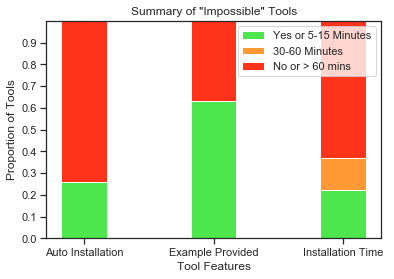

In [533]:
#pos 1 will be User Intervention Required
#pos 2 will be Example Provided
#pos 3 will be Time bins
N = 3

green = (len(dif_auto.index)/length, len(dif_ex_y.index)/length, len(dif_5_15_time.index)/length)
print green

yellow = (0, 0, len(dif_30_60_time.index)/length)
print yellow

red = ((length-len(dif_auto.index))/length,
         len(dif_ex_n.index)/length,
         len(dif_60_time.index)/length)
print red



ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, green, width, color=my_colors.green)
p2 = plt.bar(ind, yellow, width, color=my_colors.orange,
             bottom=green)
p3 = plt.bar(ind, red, width, color=my_colors.red,
             bottom=np.array(yellow)+np.array(green))

plt.ylabel('Proportion of Tools')
plt.xlabel('Tool Features')
plt.title('Summary of "Impossible" Tools')
plt.xticks(ind, ('Auto Installation', 'Example Provided', 'Installation Time'))
plt.yticks(np.arange(0, 1.0, 0.1))
plt.legend((p1[0], p2[0], p3[0]), ('Yes or 5-15 Minutes', '30-60 Minutes', 'No or > 60 mins'))
plt.ylim(ymax=1.0)
plt.show()

In [534]:
# Summary for Impossible Install
dif_status = data[(data.Difficulty_Status==1)]
length = len(dif_status.index)

dif_5_15_time = dif_status[(dif_status.Time_To_Install >= 0) & (dif_status.Time_To_Install <= 15)]
dif_30_60_time = dif_status[(dif_status.Time_To_Install >= 30) & (dif_status.Time_To_Install < 60)]
dif_60_time = dif_status[(dif_status.Time_To_Install >= 60)]

dif_ex_y = dif_status[(dif_status.Example_Provided == 'Y')]
dif_ex_n = dif_status[(dif_status.Example_Provided == 'N')]

dif_auto = dif_status[(dif_status.Commands == dif_status.Commands_Listed)]

(0.14285714285714285, 0.7619047619047619, 0.0)
(0, 0, 0.3333333333333333)
(0.8571428571428571, 0.23809523809523808, 0.6666666666666666)


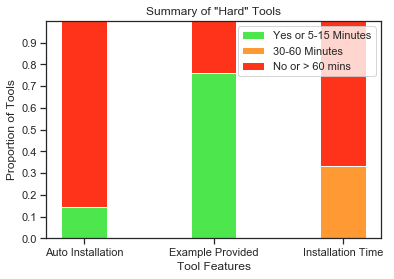

In [535]:
#pos 1 will be User Intervention Required
#pos 2 will be Example Provided
#pos 3 will be Time bins
N = 3

green = (len(dif_auto.index)/length, len(dif_ex_y.index)/length, len(dif_5_15_time.index)/length)
print green

yellow = (0, 0, len(dif_30_60_time.index)/length)
print yellow

red = ((length-len(dif_auto.index))/length,
         len(dif_ex_n.index)/length,
         len(dif_60_time.index)/length)
print red



ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, green, width, color=my_colors.green)
p2 = plt.bar(ind, yellow, width, color=my_colors.orange,
             bottom=green)
p3 = plt.bar(ind, red, width, color=my_colors.red,
             bottom=np.array(yellow)+np.array(green))

plt.ylabel('Proportion of Tools')
plt.xlabel('Tool Features')
plt.title('Summary of "Hard" Tools')
plt.xticks(ind, ('Auto Installation', 'Example Provided', 'Installation Time'))
plt.yticks(np.arange(0, 1.0, 0.1))
plt.legend((p1[0], p2[0], p3[0]), ('Yes or 5-15 Minutes', '30-60 Minutes', 'No or > 60 mins'))
plt.ylim(ymax=1.0)
plt.show()

In [536]:
# Summary for Impossible Install
dif_status = data[(data.Difficulty_Status==2)]
length = len(dif_status.index)

dif_5_15_time = dif_status[(dif_status.Time_To_Install >= 0) & (dif_status.Time_To_Install <= 15)]
dif_30_60_time = dif_status[(dif_status.Time_To_Install >= 30) & (dif_status.Time_To_Install < 60)]
dif_60_time = dif_status[(dif_status.Time_To_Install >= 60)]

dif_ex_y = dif_status[(dif_status.Example_Provided == 'Y')]
dif_ex_n = dif_status[(dif_status.Example_Provided == 'N')]

dif_auto = dif_status[(dif_status.Commands == dif_status.Commands_Listed)]

(0.78, 0.68, 1.0)
(0, 0, 0.0)
(0.22, 0.32, 0.0)


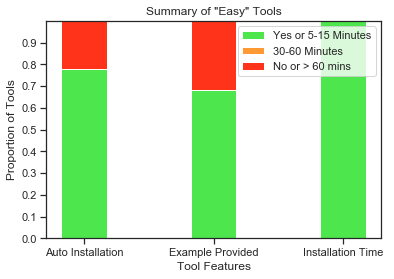

In [537]:
#pos 1 will be User Intervention Required
#pos 2 will be Example Provided
#pos 3 will be Time bins
N = 3

green = (len(dif_auto.index)/length, len(dif_ex_y.index)/length, len(dif_5_15_time.index)/length)
print green

yellow = (0, 0, len(dif_30_60_time.index)/length)
print yellow

red = ((length-len(dif_auto.index))/length,
         len(dif_ex_n.index)/length,
         len(dif_60_time.index)/length)
print red



ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, green, width, color=my_colors.green)
p2 = plt.bar(ind, yellow, width, color=my_colors.orange,
             bottom=green)
p3 = plt.bar(ind, red, width, color=my_colors.red,
             bottom=np.array(yellow)+np.array(green))

plt.ylabel('Proportion of Tools')
plt.xlabel('Tool Features')
plt.title('Summary of "Easy" Tools')
plt.xticks(ind, ('Auto Installation', 'Example Provided', 'Installation Time'))
plt.yticks(np.arange(0, 1.0, 0.1))
plt.legend((p1[0], p2[0], p3[0]), ('Yes or 5-15 Minutes', '30-60 Minutes', 'No or > 60 mins'))
plt.ylim(ymax=1.0)
plt.show()


## FIGURE B: Summary Pie Charts of the Data
### FIGURE B.1: Complex, Easy, and Not Installed

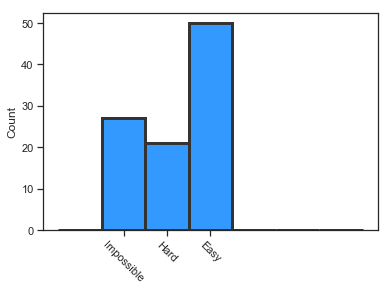

In [538]:
statuses = np.array(data["Difficulty_Status"])


f, ax = pl.subplots(1, 1)
ax.hist(statuses, np.arange(-1.5,6,1), edgecolor=(0.2,0.2,0.2), lw=3, 
            color=(0.2,0.6,1.0))

ax.set_ylabel('Count')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels( ['Impossible', 'Hard', 'Easy'], rotation=-45 )

pl.show()

In [539]:
#Lets get some data for a piechart regarding if Example is Provided
dif_status = data.groupby(['Difficulty_Status',]).size()
dif_status.head()

Difficulty_Status
0    27
1    21
2    50
dtype: int64

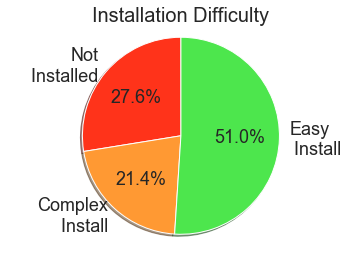

In [617]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18
labels = ['Not\n Installed', 'Complex\n Install', 'Easy\n Install']
sizes = [dif_status[0], dif_status[1], dif_status[2]]
values = [my_colors.red, my_colors.orange, my_colors.green]
fig1, ax1 = pl.subplots()

ax1.set_title("Installation Difficulty", fontsize=20)
patches, texts, autotexts= ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
texts[2].set_fontsize(18)
pl.show()

### FIGURE B.2: Automatic Installation Test??

In [541]:
#This means #commands == number listed and that installation was not impossible
#My numbers are not quite matching up with the original Figure 2 images.
pass_status = data[(data.Difficulty_Status!=0) & (data.Commands==data.Commands_Listed)]
pass_status.head()
print len(pass_status.index)

42


In [542]:
fail_status = data[(data.Difficulty_Status==0) | (data.Commands!=data.Commands_Listed)]
fail_status.head()
print len(fail_status.index)

56


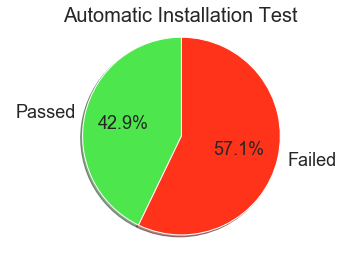

In [543]:
labels = ['Passed', 'Failed']
sizes = [len(pass_status.index), len(fail_status.index)]
values = [my_colors.green, my_colors.red]
fig1, ax1 = pl.subplots()

# ax1.set_fontsize(18)
ax1.set_title("Automatic Installation Test", fontsize=20)
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
pl.show()

### FIGURE B.3: Example Provided

In [544]:
#Lets get clean some data for a piechart regarding if Example is Provided
ex_prov_pie = data.groupby(['Example_Provided',]).size()
print ex_prov_pie

Example_Provided
N    31
Y    67
dtype: int64


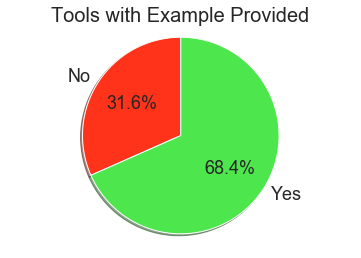

In [545]:
labels = ['No', 'Yes']
sizes = [ex_prov_pie[0], ex_prov_pie[1]]
values = [my_colors.red, my_colors.green]
fig1, ax1 = pl.subplots()

# ax1.set_fontsize(18)
ax1.set_title("Tools with Example Provided", fontsize=20)
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = values)
texts[0].set_fontsize(18)
texts[1].set_fontsize(18)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
pl.show()

## FIGURE C: Statistical Significance of Citations based on Difficulty of Installation

In [546]:
#Lets get clean some data to get sums for the number of citations
dif_status_mean = data.groupby(['Difficulty_Status',]).mean()
dif_status_std = data.groupby(['Difficulty_Status',]).std()
dif_status_size = data.groupby(['Difficulty_Status',]).size()
dif_status_sum = data.groupby(['Difficulty_Status',]).sum()
dif_status_mean.head()

,Unnamed:_0,Year,Lapsed_,Citations,Normalized_citations,Releases,Commands,Commands_Listed,Time_To_Install
Difficulty_Status,,,,,,,,,
0,65.592593,2012.259259,6.740741,81.000000,10.385391,8.777778,18.866667,6.555556,82.222222
1,40.619048,2013.142857,5.857143,672.095238,89.462642,6.000000,12.350000,4.470588,78.571429
2,46.060000,2012.060000,6.940000,1061.100000,108.689726,14.181818,2.829787,2.733333,7.800000


In [547]:
dif_status_std.head()

,Unnamed:_0,Year,Lapsed_,Citations,Normalized_citations,Releases,Commands,Commands_Listed,Time_To_Install
Difficulty_Status,,,,,,,,,
0,21.175565,2.263296,2.263296,96.218102,11.287159,14.069273,47.485136,6.563914,50.617976
1,29.761512,1.878449,1.878449,2056.765663,229.439292,7.848567,12.145066,3.356293,41.867137
2,29.122829,2.951375,2.951375,2857.206065,287.123460,15.042553,2.784422,2.847647,4.535574


In [548]:
# Custom function to draw the diff bars
def label_diff(i,j,text,X,Y):
    x = (X[i]+X[j])/2
    y = 1.1*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])

    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':25,'shrinkB':25,'linewidth':1.5}
    ax.annotate(text, xy=(X[i],y+7), zorder=10)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)

0.0385426170573
0.485458417866
0.0988516868126


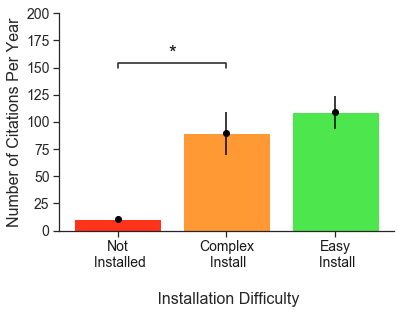

<Figure size 648x648 with 0 Axes>

In [613]:
colors = [my_colors.red, my_colors.orange, my_colors.green]
std     = [i for i in dif_status_std["Normalized_citations"]]
means   = [i for i in dif_status_mean["Normalized_citations"]]
ns = [i for i in dif_status_size]

ind  = np.arange(3)    # the x locations for the groups
width= 0.7
labels = ('Not\n Installed', 'Complex\n Install', 'Easy\n Install')

fig, ax = plt.subplots()
ax.p1 = plt.bar(ind, means, color=colors)

############################################################################################
x1, x2 = 0, 1
y, h, col = 150, 4, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

# Impossible vs Hard (S)
p_value = stats.ks_2samp(data[(data.Difficulty_Status == 0)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status == 1)].Normalized_citations.tolist())
print p_value[1]

plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)
##############################################################################################

# Hard vs Easy
p_value = stats.ks_2samp(data[(data.Difficulty_Status==1)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status==2)].Normalized_citations.tolist())
# label_diff(1,2,'P-Value: %.3f' %(p_value[1]), ind, means)
print p_value[1]

# Easy vs Impossible
p_value = stats.ks_2samp(data[(data.Difficulty_Status==0)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status==2)].Normalized_citations.tolist())
# label_diff(0,2,'P-Value: %.3f' %(p_value[1]), ind, means)
print p_value[1]


plt.errorbar(ind, means, yerr=[x/math.sqrt(n) for x,n in zip(means,ns)], fmt='o', color='black')
plt.ylim(ymax=200) 
# plt.title("Number of Citations Per Year Based on Tool Installation Difficulty\n", fontsize=14)
plt.ylabel("Number of Citations Per Year", fontsize=16)
plt.xlabel("\n Installation Difficulty", fontsize=16)
plt.xticks(ind, labels, color='k', fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.figure(figsize=(9, 9))
plt.show()

0.0317696468966


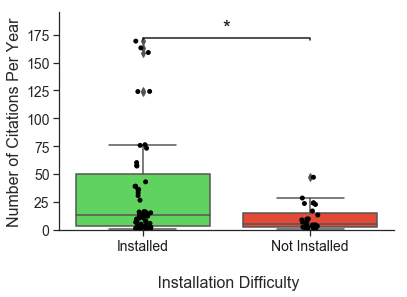

<Figure size 648x648 with 0 Axes>

In [631]:
data["install_category"] = np.where((data.Difficulty_Status==0),'Unsuccessful','Success')
sns.boxplot(x="install_category", y="Normalized_citations", data=data, 
            palette=[my_colors.green, my_colors.red],  order=["Success", "Unsuccessful"])

sns.stripplot(x="install_category", y="Normalized_citations", 
              palette=['black'], data=data,  jitter=0.05, order=["Success", "Unsuccessful"])
labels = ('Installed', 'Not Installed')
x1, x2 = 1, 0
y, h, col = 170, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

# Impossible vs Hard (S)
p_value = stats.ks_2samp(data[(data.install_category == "Success")].Normalized_citations.tolist(),
                         data[(data.install_category == "Unsuccessful")].Normalized_citations.tolist())
print p_value[1]

# Impossible vs Easy (NS)
# p_value = stats.ks_2samp(data[(data.Difficulty_Status == 0)].Normalized_citations.tolist(),
#                          data[(data.Difficulty_Status == 2)].Normalized_citations.tolist())
# print p_value[1]

# Hard vs Easy (NS)
# p_value = stats.ks_2samp(data[(data.Difficulty_Status == 1)].Normalized_citations.tolist(),
#                          data[(data.Difficulty_Status == 2)].Normalized_citations.tolist())
# print p_value[1]

ind = np.arange(2)
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)

plt.ylim(ymax=195) 
plt.ylim(ymin=0) 
plt.ylabel("Number of Citations Per Year", fontsize=16)
plt.xlabel("\n Installation Difficulty", fontsize=16)
plt.xticks(ind, labels, color='k', fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.figure(figsize=(9, 9))
plt.show()

0.0385426170573


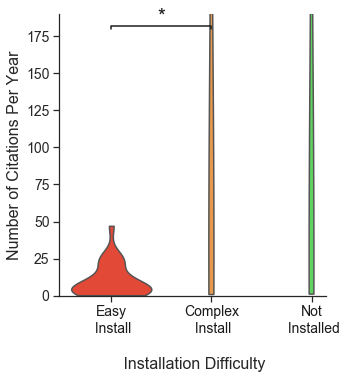

<Figure size 648x648 with 0 Axes>

In [611]:
sns.catplot(x="Difficulty_Status", y="Normalized_citations", data=data, cut=0, 
            kind="violin", palette=[my_colors.red, my_colors.orange, my_colors.green], inner=None)


x1, x2 = 0, 1
y, h, col = 180, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

# Impossible vs Hard (S)
p_value = stats.ks_2samp(data[(data.Difficulty_Status == 0)].Normalized_citations.tolist(),
                         data[(data.Difficulty_Status == 1)].Normalized_citations.tolist())
print p_value[1]

plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)

# Impossible vs Easy (NS)
# p_value = stats.ks_2samp(data[(data.Difficulty_Status == 0)].Normalized_citations.tolist(),
#                          data[(data.Difficulty_Status == 2)].Normalized_citations.tolist())
# print p_value[1]
# plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col)

# Hard vs Easy (NS)
# p_value = stats.ks_2samp(data[(data.Difficulty_Status == 1)].Normalized_citations.tolist(),
#                          data[(data.Difficulty_Status == 2)].Normalized_citations.tolist())
# print p_value[1]



plt.ylim(ymax=190) 
plt.ylim(ymin=0) 
plt.ylabel("Number of Citations Per Year", fontsize=16)
plt.xlabel("\n Installation Difficulty", fontsize=16)
plt.xticks(ind, labels, color='k', fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.figure(figsize=(9, 9))
plt.show()

## FIGURE D: Automatic Installation Test vs Installation Time

4.75941814944e-09


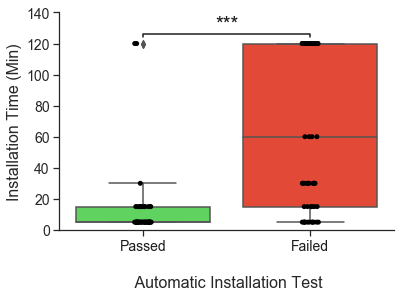

<Figure size 648x648 with 0 Axes>

In [618]:
data["auto_test"] = np.where((data.Difficulty_Status!=0) & (data.Commands==data.Commands_Listed),'Pass','Fail')

sns.boxplot(x="auto_test", y="Time_To_Install", data=data, palette=[my_colors.green, my_colors.red])
sns.stripplot(x="auto_test", y="Time_To_Install", data=data, palette=["black"], jitter=0.05)

x1, x2 = 0, 1
y, h, col = data['Time_To_Install'].max() + 4, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.auto_test=='Fail')].Time_To_Install.tolist(),
                         data[(data.auto_test=='Pass')].Time_To_Install.tolist())

print p_value[1]
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)


plt.ylim(ymin=0) 
plt.ylim(ymax=140) 
plt.xlabel("\n Automatic Installation Test", fontsize=16)
plt.ylabel("Installation Time (Min)", fontsize=16)
plt.xticks([0,1], ["Passed", "Failed"], color='k', fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.figure(figsize=(9, 9))
plt.show()

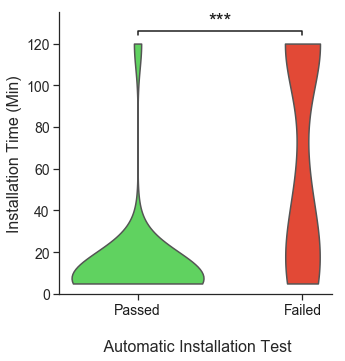

<Figure size 648x648 with 0 Axes>

In [553]:
data["auto_test"] = np.where((data.Difficulty_Status!=0) & (data.Commands==data.Commands_Listed),'Pass','Fail')

# sns.catplot(x="auto_test", y="Time_To_Install", data=data, palette=['#82E0AA', '#F5B7B1'], kind="violin")

sns.catplot(x="auto_test", y="Time_To_Install", data=data, palette=[my_colors.green, my_colors.red], kind="violin", cut=0, inner=None)
# sns.stripplot(x="auto_test", y="Time_To_Install", data=data, palette=['green', 'red'], jitter=0.05)

x1, x2 = 0, 1
y, h, col = data['Time_To_Install'].max() + 4, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.auto_test=='Fail')].Time_To_Install.tolist(),
                         data[(data.auto_test=='Pass')].Time_To_Install.tolist())

plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)


plt.ylim(ymin=0) 
plt.ylim(ymax=135) 
plt.xlabel("\n Automatic Installation Test", fontsize=16)
plt.ylabel("Installation Time (Min)", fontsize=16)
plt.xticks([0,1], ["Passed", "Failed"], color='k', fontsize=14)
plt.yticks(fontsize=14)
plt.figure(figsize=(9, 9))
plt.show()

In [554]:
# data["auto_test"] = np.where((data.Difficulty_Status!=0) & (data.Commands==data.Commands_Listed),'Pass','Fail')

# sns.boxplot(x="auto_test", y="Time_To_Install", data=data, palette=[my_colors.green, my_colors.red])
# sns.stripplot(x="auto_test", y="Time_To_Install", data=data, palette=['black'], zorder=0.05)

# x1, x2 = 0, 1
# y, h, col = data['Time_To_Install'].max() + 4, 2, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

# p_value = stats.ks_2samp(data[(data.auto_test=='Fail')].Time_To_Install.tolist(),
#                          data[(data.auto_test=='Pass')].Time_To_Install.tolist())

# plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col)


# plt.ylim(ymin=0) 
# plt.ylim(ymax=135) 
# plt.xlabel("Automatic Installation Test")
# plt.ylabel("Installation Time (Min)")
# plt.xticks(ind, ["Passed", "Failed"], color='k')
# plt.show()

## FIGURE E: Effect of Bioconda Package Manger on Installation Time

In [555]:
## TODO Be sure No = all other groups besides Other and Bioconda

0.00177169570443
0.0232374802938


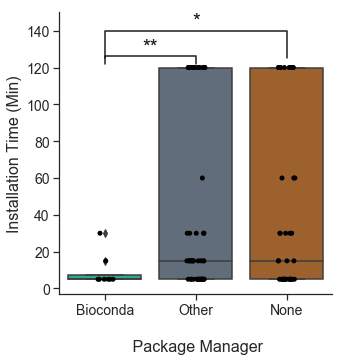

<Figure size 648x648 with 0 Axes>

In [619]:
conditions = [
    (data['Source_'] == 'Bioconda'),
     (data['Source_'] == 'Other')]
choices = ['Bioconda', 'Other']
data['custom_source'] = np.select(conditions, choices, default='None')
sns.catplot(x="custom_source", y="Time_To_Install", kind="box", data=data, palette=["#1ABC9C","#5D6D7E", "#AF601A"])
# sns.swarmplot(x="custom_source", y="Time_To_Install", data=data, palette=["#7D3C98","#717D7E", "#2874A6"])
sns.stripplot(x="custom_source", y="Time_To_Install", data=data, palette=["black"])

x1, x2 = 0, 1
y, h, col = data['Time_To_Install'].max() + 2, 4, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.custom_source=='Bioconda')].Normalized_citations.tolist(),
                         data[(data.custom_source=='Other')].Normalized_citations.tolist())
print p_value[1]
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)

x1, x2 = 0, 2
y, h, col = data['Time_To_Install'].max() + 5, 15, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.custom_source=='Bioconda')].Normalized_citations.tolist(),
                         data[(data.custom_source=='None')].Normalized_citations.tolist())

print p_value[1]
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)

plt.ylim(ymax=150) 
plt.xlabel("\n Package Manager", fontsize=16)
plt.ylabel("Installation Time (Min)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.figure(figsize=(9, 9))
plt.show()

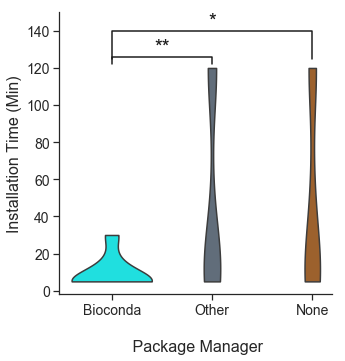

<Figure size 648x648 with 0 Axes>

In [621]:

sns.catplot(x="custom_source", y="Time_To_Install", kind="violin",
            data=data, palette=["#00FFFF","#5D6D7E", "#AF601A"],fliersize=0, cut=0, inner=None)


x1, x2 = 0, 1
y, h, col = data['Time_To_Install'].max() + 2, 4, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.custom_source=='Bioconda')].Normalized_citations.tolist(),
                         data[(data.custom_source=='Other')].Normalized_citations.tolist())
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)

x1, x2 = 0, 2
y, h, col = data['Time_To_Install'].max() + 5, 15, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.custom_source=='Bioconda')].Normalized_citations.tolist(),
                         data[(data.custom_source=='None')].Normalized_citations.tolist())
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)

plt.ylim(ymax=150) 
plt.xlabel("\n Package Manager", fontsize=16)
plt.ylabel("Installation Time (Min)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.figure(figsize=(9, 9))
plt.show()

## FIGURE F: Portion of Undocumented Commands Compared to Difficulty Status

In [558]:
data.head(10)

,Unnamed:_0,ID,Domain,Year,Lapsed_,Language,Update,Source_,Source_Control,Reason,...,Releases,Error._Hard_codding._Broken_invalid_link._Yes/No,Outdated_Dependency,Commands,Commands_Listed,Time_To_Install,Difficulty_Status,Example_Provided,auto_test,custom_source
0,1,mp1,mapping,2009,10,C++,2017,Bioconda,Y,NaN,...,30.0,N,N,1.0,1.0,5,2,Y,Pass,Bioconda
1,2,mp2,mapping,2013,6,C++,2017,Bioconda,Y,NaN,...,36.0,N,N,1.0,1.0,5,2,Y,Pass,Bioconda
2,3,mp3,mapping,2012,7,C++,2014,Bioconda,N,NaN,...,16.0,N,N,1.0,1.0,5,2,Y,Pass,Bioconda
3,4,mp4,mapping,2004,15,C++,2017,Bioconda,N,NaN,...,7.0,N,N,1.0,1.0,5,2,Y,Pass,Bioconda
4,5,mp5,mapping,2009,10,C,2011,Bioconda,N,NaN,...,12.0,N,N,1.0,1.0,15,2,Y,Pass,Bioconda
5,6,mp6,mapping,2009,10,C++,2012,Bioconda,N,NaN,...,21.0,N,N,1.0,1.0,5,2,Y,Pass,Bioconda
6,7,mp7,mapping,2009,10,C,2014,Bioconda,N,NaN,...,23.0,N,N,1.0,1.0,5,2,Y,Pass,Bioconda
7,8,mp8,mapping,2008,11,C,2008,Other,N,NaN,...,23.0,N,N,3.0,3.0,5,2,Y,Pass,Other
8,9,mp9,mapping,2013,6,C++,2016,Other,N,NaN,...,17.0,N,N,22.0,4.0,30,1,Y,Fail,Other
9,10,mp10,mapping,2015,4,C++,2017,Bioconda,Y,NaN,...,7.0,Y,N,1.0,1.0,30,1,Y,Pass,Bioconda


2.27162261148e-06
4.73871235007e-06


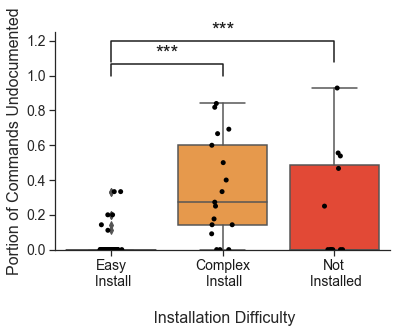

<Figure size 648x648 with 0 Axes>

In [629]:
data["Portion_Undocumented"] = (data["Commands"]-data["Commands_Listed"])/(data["Commands"] + data["Commands_Listed"])
sns.boxplot(x="Difficulty_Status", y="Portion_Undocumented", data=data, 
            palette=[my_colors.green, my_colors.orange, my_colors.red], order=[2,1,0])
sns.stripplot(x="Difficulty_Status", y="Portion_Undocumented", data=data, palette=["black"], order=[2,1,0])
labels = ('Easy\n Install', 'Complex\n Install', 'Not\n Installed')
ind  = np.arange(3)

x1, x2 = 0, 2
y, h, col = data['Portion_Undocumented'].max() + 0.15, 0.12, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.Difficulty_Status==0)].Portion_Undocumented.tolist(),
                         data[(data.Difficulty_Status==2)].Portion_Undocumented.tolist())
print p_value[1]
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)


x1, x2 = 0, 1
y, h, col = data['Portion_Undocumented'].max() + 0.07, 0.07, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.Difficulty_Status==1)].Portion_Undocumented.tolist(),
                         data[(data.Difficulty_Status==2)].Portion_Undocumented.tolist())
print p_value[1]
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)

plt.ylim(ymax=1.25) 
plt.ylim(ymin=0) 
plt.xlabel("\n Installation Difficulty", fontsize=16)
plt.ylabel("Portion of Commands Undocumented", fontsize=16)
plt.xticks(ind, labels, color='k', fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.figure(figsize=(9, 9))
plt.show()

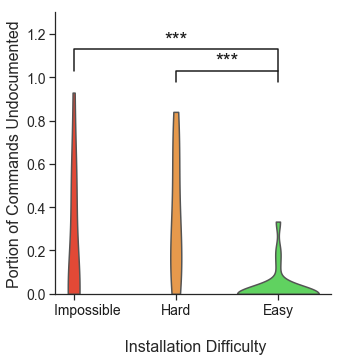

<Figure size 648x648 with 0 Axes>

In [560]:
data["Portion_Undocumented"] = (data["Commands"]-data["Commands_Listed"])/(data["Commands"] + data["Commands_Listed"])
sns.catplot(x="Difficulty_Status", y="Portion_Undocumented", data=data, 
            palette=[my_colors.red, my_colors.orange, my_colors.green], 
            kind="violin", cut=0, inner=None)
# sns.stripplot(x="Difficulty_Status", y="Portion_Undocumented", data=data, palette=['black', 'black', 'black'], jitter=0.05)
labels = ["       Impossible", "Hard", "Easy"]
ind  = np.arange(3)
x1, x2 = 0, 2
y, h, col = data['Portion_Undocumented'].max() + 0.1, 0.1, 'k'
# print data['Portion_Undocumented'].max()
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.Difficulty_Status==0)].Portion_Undocumented.tolist(),
                         data[(data.Difficulty_Status==2)].Portion_Undocumented.tolist())
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)

x1, x2 = 1, 2
y, h, col = data['Portion_Undocumented'].max() + 0.05, 0.05, 'k'
# print data['Portion_Undocumented'].max()
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.Difficulty_Status==1)].Portion_Undocumented.tolist(),
                         data[(data.Difficulty_Status==2)].Portion_Undocumented.tolist())
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col, fontsize=20)

plt.ylim(ymax=1.3) 
plt.ylim(ymin=0) 
plt.xlabel("\n Installation Difficulty", fontsize=16)
plt.ylabel("Portion of Commands Undocumented", fontsize=16)
plt.xticks(ind, labels, color='k', fontsize=14)
plt.yticks(fontsize=14)
plt.figure(figsize=(9, 9))
sns.despine()
plt.show()

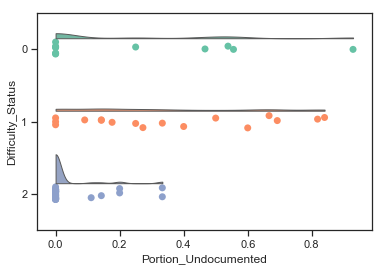

In [561]:
import ptitprince as pt
ax=pt.half_violinplot(data = data, palette = "Set2", bw=.2,  linewidth=1,cut=0., orient="h",\
                   scale="area", width=.8, inner=None,y="Difficulty_Status", x="Portion_Undocumented")
ax=sns.stripplot(data=data, palette="Set2", edgecolor="white",size=7, orient="h",\
                 y="Difficulty_Status", x="Portion_Undocumented",jitter=1,zorder=0)
# ax=sns.boxplot(data=data, color="black",width=.15, y="Difficulty_Status", x="Portion_Undocumented",zorder=10,\
#               showcaps=True,boxprops={'facecolor':'none', "zorder":10},\
#                showfliers=True,whiskerprops={'linewidth':2, "zorder":10},saturation=1)

# SUPPLEMENTARY FIGURES

## FIGURE NEW: Suggested by Serghei to see if statistical significance between citations based on example provided

In [562]:
#Lets get clean some data to get sums for the number of citations
ex_status_mean = data.groupby(['Example_Provided',]).mean()
ex_status_std = data.groupby(['Example_Provided',]).std()
ex_status_size = data.groupby(['Example_Provided',]).size()
ex_status_sum = data.groupby(['Example_Provided',]).sum()
ex_status_mean.head()

,Unnamed:_0,Year,Lapsed_,Citations,Normalized_citations,Releases,Commands,Commands_Listed,Time_To_Install,Difficulty_Status,Portion_Undocumented
Example_Provided,,,,,,,,,,,
N,67.806452,2012.516129,6.483871,122.225806,15.794278,5.142857,4.863636,3.631579,48.387097,1.193548,0.067302
Y,42.164179,2012.268657,6.731343,978.611940,106.029622,12.543478,9.266667,4.065574,41.194030,1.253731,0.152153


0.12919547999


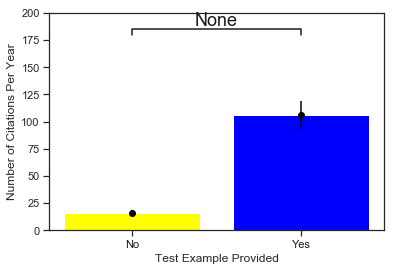

In [563]:
colors = ('yellow', 'blue')
std     = [i for i in ex_status_std["Normalized_citations"]]
means   = [i for i in ex_status_mean["Normalized_citations"]]
ns = [i for i in ex_status_size]

ind  = np.arange(2)    # the x locations for the groups
width= 0.7
labels = ('No', 'Yes')

fig, ax = plt.subplots()
ax.p1 = plt.bar(ind, means, color=colors)

x1, x2 = 0, 1
y, h, col = 180, 5, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
p_value = stats.ks_2samp(data[(data.Example_Provided=='Y')].Normalized_citations.tolist(),
                         data[(data.Example_Provided=='N')].Normalized_citations.tolist())
print p_value[1]

plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col)

plt.errorbar(ind, means, yerr=[x/math.sqrt(n) for x,n in zip(means,ns)], fmt='o', color='black')
plt.ylim(ymax=200) 
# plt.title("Number of Citations Per Year Based on Tool Installation Difficulty\n", fontsize=14)
plt.ylabel("Number of Citations Per Year")
plt.xlabel("Test Example Provided")
plt.xticks(ind, labels, color='k')
plt.show()

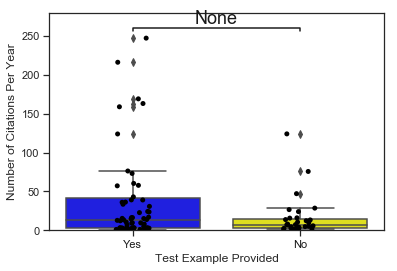

In [564]:
ax = sns.boxplot(x="Example_Provided", y="Normalized_citations", data=data, palette=["blue", "yellow"])
sns.stripplot(x="Example_Provided", y="Normalized_citations", palette=["black"], data=data)
ax.set_ylim(0,280)
plt.ylabel("Number of Citations Per Year")
plt.xlabel("Test Example Provided")
labels = ('Yes', 'No')
plt.xticks(ind, labels, color='k')


x1, x2 = 0, 1
y, h, col = 250 + 7, 4, 'k'
# print data['Portion_Undocumented'].max()
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)

p_value = stats.ks_2samp(data[(data.Example_Provided=='Y')].Normalized_citations.tolist(),
                         data[(data.Example_Provided=='N')].Normalized_citations.tolist())
plt.text((x1+x2)*.5, y+h, my_star(p_value[1]), ha='center', va='bottom', color=col)


plt.show()

In [565]:
new_data = data.groupby(['Year','Difficulty_Status',]).size()
# ex_status_size = data.groupby(['Example_Provided',]).size()
new_data.head(100)

Year  Difficulty_Status
2004  2                     1
2008  2                     2
2009  0                     3
      1                     1
      2                    12
2010  0                     4
      1                     1
      2                     3
2011  0                     4
      1                     2
      2                     2
2012  0                     5
      1                     3
      2                     5
2013  0                     3
      1                     5
      2                     9
2014  0                     3
      1                     2
      2                     3
2015  0                     1
      1                     6
      2                     7
2016  0                     4
      1                     1
      2                     4
2017  2                     1
2018  2                     1
dtype: int64

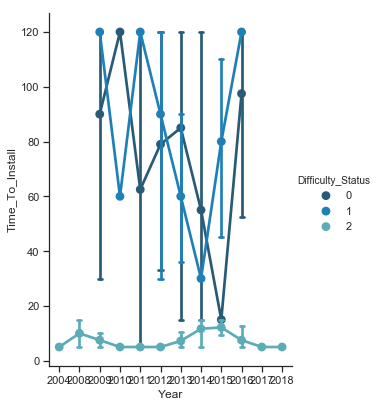

In [566]:
g = sns.catplot(x="Year", y="Time_To_Install", hue="Difficulty_Status",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=data)

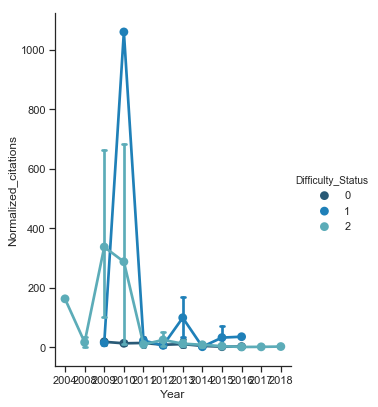

In [567]:
g = sns.catplot(x="Year", y="Normalized_citations", hue="Difficulty_Status",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=data)

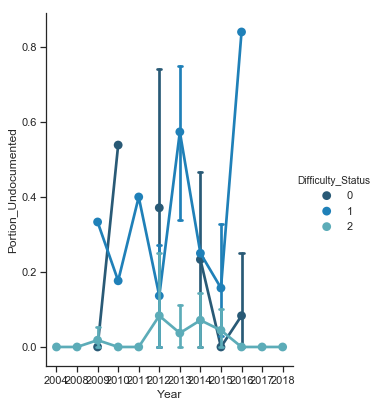

In [568]:
g = sns.catplot(x="Year", y="Portion_Undocumented", hue="Difficulty_Status",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=data)